In [1]:
from keras.initializers import VarianceScaling
from keras.optimizers import SGD
from utils.dec import DEC
from utils.resnet50 import load_cifar10_resnet50
import matplotlib.pyplot as plt

In [2]:
x,x_test,y,y_test = load_cifar10_resnet50()

The 0th 1000 samples


Extracting features...
32/32 [==============================] - 83s 2s/step
Features shape =  (1000, 2048)
The 1th 1000 samples
Extracting features...
32/32 [==============================] - 73s 2s/step
Features shape =  (1000, 2048)
The 2th 1000 samples
Extracting features...
32/32 [==============================] - 70s 2s/step
Features shape =  (1000, 2048)
The 3th 1000 samples
Extracting features...
32/32 [==============================] - 83s 3s/step
Features shape =  (1000, 2048)
The 4th 1000 samples
Extracting features...
32/32 [==============================] - 46s 1s/step
Features shape =  (1000, 2048)
The 5th 1000 samples
Extracting features...
32/32 [==============================] - 51s 2s/step
Features shape =  (1000, 2048)
The 6th 1000 samples
Extracting features...
32/32 [==============================] - 90s 3s/step
Features shape =  (1000, 2048)
The 7th 1000 samples
Extracting features...
32/32 [==============================] - 91s 3s/step
Featu

In [3]:
x.shape

(50000, 2048)

In [4]:
x_test.shape

(10000, 2048)

CIFAR-10 with Resnet50

In [5]:
dims = [x.shape[-1], 500, 500, 2000, 10]

loss = 'mse'
optimizer = SGD(1., 0.9)
init = VarianceScaling(scale=1./3., mode='fan_in', distribution='uniform')
n_clusters=10

# DEC model
dec = DEC(dims=dims, n_clusters=n_clusters, initializer=init)
dec.compile(optimizer=optimizer, loss=loss)
dec.model.summary()

C:\Users\vioritiva\AppData\Roaming\Python\Python311\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "model_120"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2048)]            0         
                                                                 
 encoder_0 (Dense)           (None, 500)               1024500   
                                                                 
 encoder_1 (Dense)           (None, 500)               250500    
                                                                 
 encoder_2 (Dense)           (None, 2000)              1002000   
                                                                 
 encoder_3 (Dense)           (None, 10)                20010     
                                                                 
 clustering (ClusteringLaye  (None, 10)                100       
 r)                                                              
                                                         

In [6]:
init = 'glorot_uniform'
pretrain_optimizer = 'adam'
update_interval = 140
pretrain_epochs = 1000
init = VarianceScaling(scale=1. / 3., mode='fan_in',distribution='uniform')  
pretrain_optimizer = SGD(learning_rate=1., momentum=0.9)
dec.pretrain(x=x, optimizer=pretrain_optimizer,
                    epochs=pretrain_epochs,save_dir=None)
dec.compile(optimizer=SGD(0.01, 0.9), loss='kld')
dec.fit(x,
                update_interval=update_interval,
                save_dir=None)

Pretraining autoencoder model...
Epoch 1/5000

196/196 [==============================] - 19s 66ms/step - loss: 3.1666e-05
Epoch 2/5000
196/196 [==============================] - 13s 65ms/step - loss: 1.9049e-05
Epoch 3/5000
196/196 [==============================] - 13s 65ms/step - loss: 1.8877e-05
Epoch 4/5000
196/196 [==============================] - 13s 64ms/step - loss: 1.8875e-05
Epoch 5/5000
196/196 [==============================] - 12s 61ms/step - loss: 1.8875e-05
Epoch 6/5000
196/196 [==============================] - 12s 62ms/step - loss: 1.8875e-05
Epoch 7/5000
196/196 [==============================] - 12s 63ms/step - loss: 1.8874e-05
Epoch 8/5000
196/196 [==============================] - 11s 57ms/step - loss: 1.8874e-05
Epoch 9/5000
196/196 [==============================] - 9s 48ms/step - loss: 1.8874e-05
Epoch 10/5000
196/196 [==============================] - 9s 46ms/step - loss: 1.8874e-05
Epoch 11/5000
196/196 [==============================] - 9s 46ms/step - loss:

array([1, 9, 0, ..., 4, 4, 0], dtype=int64)

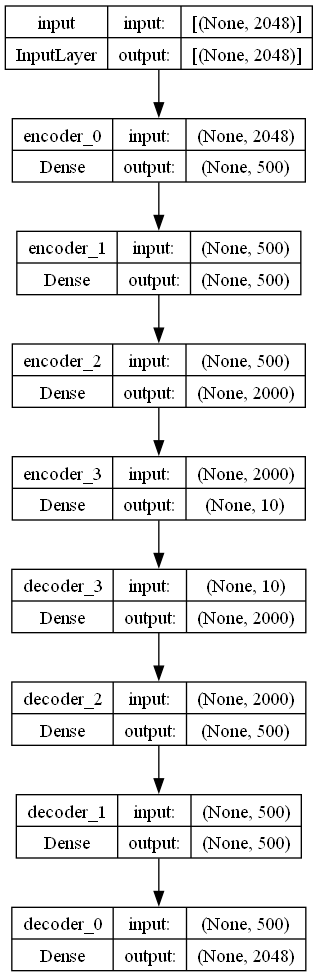

In [8]:
from keras.utils import plot_model
plot_model(dec._autoencoder, to_file='./results/autoencoder_resnet50.png', show_shapes=True)
from IPython.display import Image
Image(filename='./results/autoencoder_resnet50.png')

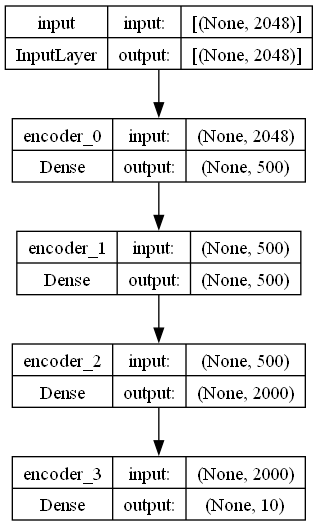

In [9]:
from keras.utils import plot_model
plot_model(dec._encoder, to_file='./results/encoder_resnet50.png', show_shapes=True)
from IPython.display import Image
Image(filename='./results/encoder_resnet50.png')

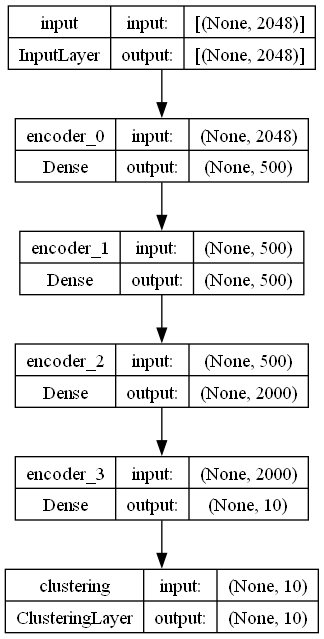

In [10]:
from keras.utils import plot_model
plot_model(dec._model, to_file='./results/dec_resnet50.png', show_shapes=True)
from IPython.display import Image
Image(filename='./results/dec_resnet50.png')

In [32]:
y_pred = dec.predict(x)

In [33]:
#Creating a Mapping Between Predicted Labels and Clusters Based on Majority Labels within Each Cluster
import numpy as np
relation = dict((x, 0) for x in range(n_clusters))
for i in range(n_clusters):
    u, indeces = np.unique(y_pred[y == i], return_inverse=True)
    i_pred = u[np.argmax(np.bincount(indeces))]
    relation[i_pred] = i
    
relation

{0: 2, 1: 7, 2: 0, 3: 9, 4: 6, 5: 5, 6: 8, 7: 1, 8: 4, 9: 3}

In [34]:
y_pred_corr = np.array(list(map(lambda x: relation[x], y_pred)))

In [35]:
print (y[:30])
print (y_pred_corr[:30])

[6 9 9 4 1 1 2 7 8 3 4 7 7 2 9 9 9 3 2 6 4 3 6 6 2 6 3 5 4 0]
[6 7 1 6 0 1 4 2 0 9 4 7 2 8 9 8 9 3 6 2 0 1 6 6 4 6 5 6 7 0]


In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred_corr)

0.33912

In [39]:
from sklearn.metrics import normalized_mutual_info_score

normalized_mutual_info_score(y, y_pred_corr)

0.2380594793738701

In [17]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x, y_pred)

print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.03586982949685757


X_test

In [7]:
y_test.shape

(10000,)

In [6]:
y_test = y_test.reshape(10000)
y_test.shape

(10000,)

In [45]:
x.shape

(50000, 2048)

In [ ]:
y_pred_test = dec.predict(x_test)

In [21]:
#Creating a Mapping Between Predicted Labels and Clusters Based on Majority Labels within Each Cluster
relation = dict((x_test, 0) for x_test in range(n_clusters))
for i in range(n_clusters):
    u, indeces = np.unique(y_pred_test[y_test == i], return_inverse=True)
    i_pred = u[np.argmax(np.bincount(indeces))]
    relation[i_pred] = i
    
relation

{0: 2, 1: 7, 2: 0, 3: 9, 4: 6, 5: 5, 6: 8, 7: 1, 8: 4, 9: 3}

In [22]:
y_pred_corr_test = np.array(list(map(lambda x_test: relation[x_test], y_pred_test)))

In [23]:
print (y_test[:30])
print (y_pred_corr_test[:30])

[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 5 2 4 0 9 6]
[3 0 0 8 4 6 1 2 5 9 8 9 3 7 9 6 3 3 0 6 7 8 2 1 2 2 2 2 7 4]


In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_corr_test)

0.3369

In [25]:
from sklearn.metrics import normalized_mutual_info_score

normalized_mutual_info_score(y_test, y_pred_corr_test)


0.23822578580618461

In [26]:
from sklearn.metrics import silhouette_score
# Calculate the silhouette score
silhouette_avg = silhouette_score(x_test, y_pred_test)

print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.03508830775571632


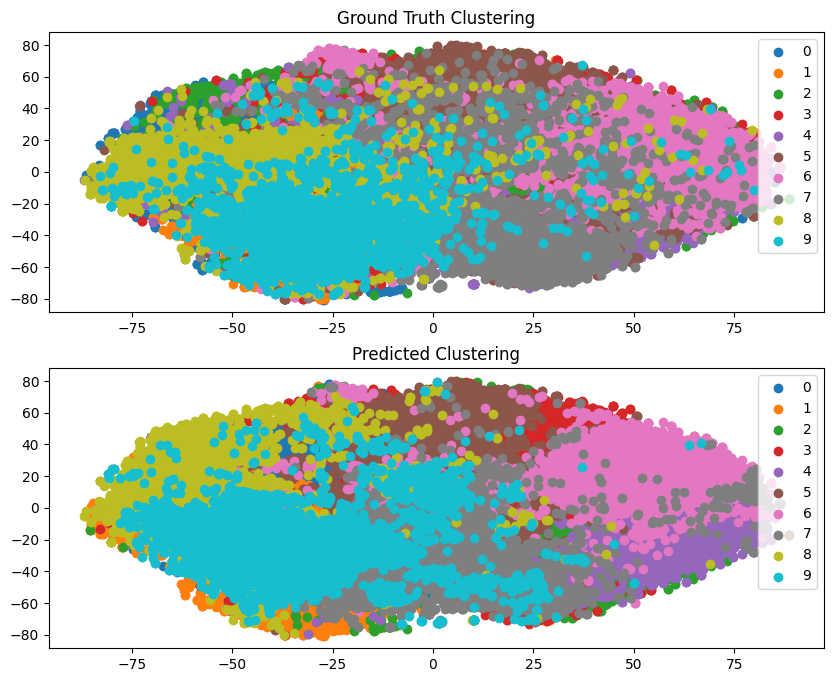

In [27]:

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


# Dimensionality reduction for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(x)

# Visualize clustering results
plt.figure(figsize=(10, 8))

# Plot ground truth labels
plt.subplot(2, 1, 1)
for i in range(10):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=str(i))
plt.title('Ground Truth Clustering')
plt.legend()

# Plot predicted labels
plt.subplot(2, 1, 2)
for i in range(10):
    plt.scatter(X_tsne[y_pred_corr == i, 0], X_tsne[y_pred_corr == i, 1], label=str(i))
plt.title('Predicted Clustering')
plt.legend()

plt.show()


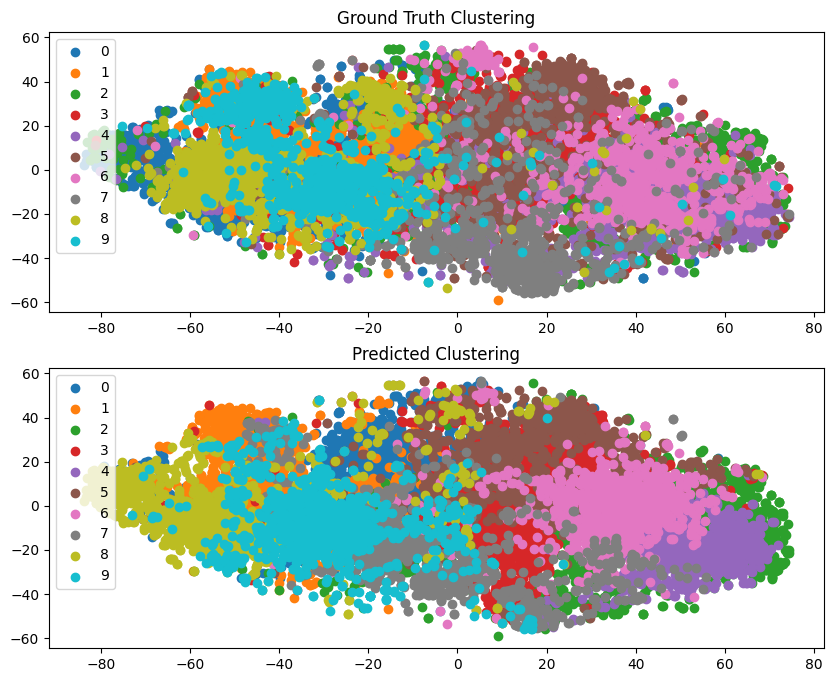

In [28]:

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


# Dimensionality reduction for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(x_test)

# Visualize clustering results
plt.figure(figsize=(10, 8))

# Plot ground truth labels
plt.subplot(2, 1, 1)
for i in range(10):
    plt.scatter(X_tsne[y_test == i, 0], X_tsne[y_test == i, 1], label=str(i))
plt.title('Ground Truth Clustering')
plt.legend()

# Plot predicted labels
plt.subplot(2, 1, 2)
for i in range(10):
    plt.scatter(X_tsne[y_pred_corr_test == i, 0], X_tsne[y_pred_corr_test == i, 1], label=str(i))
plt.title('Predicted Clustering')
plt.legend()

plt.show()


In [29]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

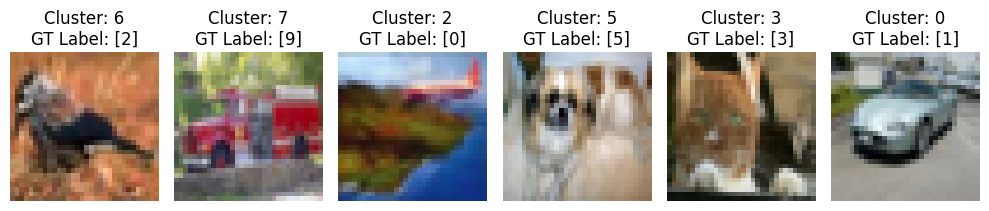

In [30]:
from keras.preprocessing import image
# Visualize random predicted images and ground truth labels
num_samples_to_visualize = 6
fig, axes = plt.subplots(1, num_samples_to_visualize, figsize=(10, 2))

for i in range(num_samples_to_visualize):
    # Choose a random index
    idx = np.random.randint(0, len(x_train))
    
    # Get the image and its corresponding ground truth label
    img = x_train[idx]
    y_true = y_train[idx]
    
    # Get the predicted cluster label
    predicted_cluster = y_pred_corr[idx]
    
    # Plot the image
    axes[i].imshow(image.array_to_img(img))
    axes[i].set_title(f"Cluster: {predicted_cluster}\nGT Label: {y_true}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from keras.preprocessing import image
# Visualize random predicted images and ground truth labels
num_samples_to_visualize = 6
fig, axes = plt.subplots(1, num_samples_to_visualize, figsize=(10, 2))

for i in range(num_samples_to_visualize):
    # Choose a random index
    idx = np.random.randint(0, len(x_test))
    
    # Get the image and its corresponding ground truth label
    img = x_test[idx]
    y_true = y_test[idx]
    
    # Get the predicted cluster label
    predicted_cluster = y_pred_corr_test[idx]
    
    # Plot the image
    axes[i].imshow(image.array_to_img(img))
    axes[i].set_title(f"Cluster: {predicted_cluster}\nGT Label: {y_true}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()